In [ ]:
# dataset link: https://www.kaggle.com/datasets/veeralakrishna/cricsheet-a-retrosheet-for-cricket

In [ ]:
!unzip /content/t20s.zip -d data

Archive:  /content/t20s.zip
  inflating: data/1001349.yaml       
  inflating: data/1001351.yaml       
  inflating: data/1001353.yaml       
  inflating: data/1004729.yaml       
  inflating: data/1007655.yaml       
  inflating: data/1007657.yaml       
  inflating: data/1007659.yaml       
  inflating: data/1019979.yaml       
  inflating: data/1019981.yaml       
  inflating: data/1019983.yaml       
  inflating: data/1020029.yaml       
  inflating: data/1031431.yaml       
  inflating: data/1031433.yaml       
  inflating: data/1031435.yaml       
  inflating: data/1031665.yaml       
  inflating: data/1034825.yaml       
  inflating: data/1034827.yaml       
  inflating: data/1034829.yaml       
  inflating: data/1040485.yaml       
  inflating: data/1040487.yaml       
  inflating: data/1040489.yaml       
  inflating: data/1041615.yaml       
  inflating: data/1041617.yaml       
  inflating: data/1043989.yaml       
  inflating: data/1043991.yaml       
  inflating: data/1043

In [ ]:
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm

In [ ]:
filenames = []
for file in os.listdir('data'):
    filenames.append(os.path.join('data',file))

In [ ]:
filenames[0:5]

['data/683015.yaml',
 'data/1173062.yaml',
 'data/1197246.yaml',
 'data/1173066.yaml',
 'data/951319.yaml']

In [ ]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = pd.concat([final_df, df], ignore_index=True)  # Use pd.concat instead of append
        counter += 1

final_df


 80%|████████  | 1152/1433 [03:53<00:57,  4.92it/s]


NotImplementedError: 

In [ ]:
backup = final_df.copy()

In [ ]:
final_df

,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.neutral_venue,info.outcome.by.wickets,...,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.match_type_number,info.outcome.by.runs,info.outcome.result,info.outcome.method,info.outcome.eliminator
0,"[{'1st innings': {'team': 'England', 'deliveri...",0.9,2014-05-03,2,Mirpur,[2014-04-06],female,T20,1.0,6.0,...,field,Australia,"[Aleem Dar, M Erasmus]",Shere Bangla National Stadium,1,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'South Africa', 'del...",0.9,2020-03-01,1,Sydney,[2020-03-01],female,T20,NaN,NaN,...,bat,South Africa,"[GO Brathwaite, Kim Cotton]",Sydney Showground Stadium,2,860.0,17.0,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Japan', 'deliveries...",0.9,2019-09-30,1,Incheon,[2019-09-19],female,T20,NaN,NaN,...,field,South Korea,"[Ryu Roni, Shahid Gill]",Yeonhui Cricket Ground,3,761.0,12.0,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Thailand', 'deliver...",0.9,2020-03-03,1,Sydney,[2020-03-03],female,T20,NaN,NaN,...,bat,Thailand,"[CM Brown, CA Polosak]",Sydney Showground Stadium,4,864.0,NaN,no result,NaN,NaN
4,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-12,1,Dharamsala,[2016-03-11],male,T20,1.0,NaN,...,field,Ireland,"[NJ Llong, RJ Tucker]",Himachal Pradesh Cricket Association Stadium,5,NaN,NaN,no result,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,"[{'1st innings': {'team': 'Scotland', 'deliver...",0.9,2019-08-14,1,Deventer,[2019-08-10],female,T20,NaN,NaN,...,bat,Scotland,"[Ryan Milne, WPM van Liemt]",Sportpark Het Schootsveld,1148,720.0,11.0,NaN,NaN,NaN
1148,"[{'1st innings': {'team': 'Namibia', 'deliveri...",0.9,2020-01-01,1,Windhoek,[2019-04-02],female,T20,NaN,NaN,...,field,Botswana,"[Pieter Groenewald, Hein Heydenrych]",United Cricket Club Ground,1149,606.0,88.0,NaN,NaN,NaN
1149,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2019-10-21,1,Dubai,[2019-10-19],male,T20,NaN,NaN,...,bat,Netherlands,"[Sharfuddoula, RR Wimalasiri]",ICC Academy,1150,941.0,44.0,NaN,NaN,NaN
1150,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2010-05-02,3,Guyana,[2010-04-30],male,T20,NaN,NaN,...,bat,West Indies,"[Asad Rauf, BF Bowden]",Providence Stadium,1151,NaN,70.0,NaN,NaN,NaN


In [ ]:
final_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets'
],inplace=True)

KeyError: "['info.outcome.bowl_out', 'info.bowl_out', 'info.supersubs.South Africa', 'info.supersubs.New Zealand'] not found in axis"

In [ ]:
final_df

,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.neutral_venue,info.outcome.by.wickets,...,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.match_type_number,info.outcome.by.runs,info.outcome.result,info.outcome.method,info.outcome.eliminator
0,"[{'1st innings': {'team': 'England', 'deliveri...",0.9,2014-05-03,2,Mirpur,[2014-04-06],female,T20,1.0,6.0,...,field,Australia,"[Aleem Dar, M Erasmus]",Shere Bangla National Stadium,1,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'South Africa', 'del...",0.9,2020-03-01,1,Sydney,[2020-03-01],female,T20,NaN,NaN,...,bat,South Africa,"[GO Brathwaite, Kim Cotton]",Sydney Showground Stadium,2,860.0,17.0,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Japan', 'deliveries...",0.9,2019-09-30,1,Incheon,[2019-09-19],female,T20,NaN,NaN,...,field,South Korea,"[Ryu Roni, Shahid Gill]",Yeonhui Cricket Ground,3,761.0,12.0,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Thailand', 'deliver...",0.9,2020-03-03,1,Sydney,[2020-03-03],female,T20,NaN,NaN,...,bat,Thailand,"[CM Brown, CA Polosak]",Sydney Showground Stadium,4,864.0,NaN,no result,NaN,NaN
4,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-12,1,Dharamsala,[2016-03-11],male,T20,1.0,NaN,...,field,Ireland,"[NJ Llong, RJ Tucker]",Himachal Pradesh Cricket Association Stadium,5,NaN,NaN,no result,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,"[{'1st innings': {'team': 'Scotland', 'deliver...",0.9,2019-08-14,1,Deventer,[2019-08-10],female,T20,NaN,NaN,...,bat,Scotland,"[Ryan Milne, WPM van Liemt]",Sportpark Het Schootsveld,1148,720.0,11.0,NaN,NaN,NaN
1148,"[{'1st innings': {'team': 'Namibia', 'deliveri...",0.9,2020-01-01,1,Windhoek,[2019-04-02],female,T20,NaN,NaN,...,field,Botswana,"[Pieter Groenewald, Hein Heydenrych]",United Cricket Club Ground,1149,606.0,88.0,NaN,NaN,NaN
1149,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2019-10-21,1,Dubai,[2019-10-19],male,T20,NaN,NaN,...,bat,Netherlands,"[Sharfuddoula, RR Wimalasiri]",ICC Academy,1150,941.0,44.0,NaN,NaN,NaN
1150,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2010-05-02,3,Guyana,[2010-04-30],male,T20,NaN,NaN,...,bat,West Indies,"[Asad Rauf, BF Bowden]",Providence Stadium,1151,NaN,70.0,NaN,NaN,NaN


In [ ]:
final_df['info.gender'].value_counts()

,count
info.gender,
male,767
female,385


In [ ]:
final_df = final_df[final_df['info.gender'] == 'male']
final_df.drop(columns=['info.gender'],inplace=True)
final_df

<ipython-input-14-75c075e09be7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.gender'],inplace=True)


,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.match_type,info.neutral_venue,info.outcome.by.wickets,info.outcome.winner,...,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.match_type_number,info.outcome.by.runs,info.outcome.result,info.outcome.method,info.outcome.eliminator
4,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-12,1,Dharamsala,[2016-03-11],T20,1.0,NaN,NaN,...,field,Ireland,"[NJ Llong, RJ Tucker]",Himachal Pradesh Cricket Association Stadium,5,NaN,NaN,no result,NaN,NaN
5,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-03-14,1,Dharamsala,[2016-03-13],T20,1.0,NaN,Netherlands,...,field,Ireland,"[NJ Llong, S Ravi]",Himachal Pradesh Cricket Association Stadium,6,NaN,12.0,NaN,NaN,NaN
7,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2020-11-30,1,Mount Maunganui,[2020-11-30],T20,NaN,NaN,NaN,...,field,New Zealand,"[SB Haig, WR Knights]",Bay Oval,8,1112.0,NaN,no result,NaN,NaN
9,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2015-11-12,1,Bulawayo,[2015-10-28],T20,NaN,5.0,Afghanistan,...,bat,Zimbabwe,"[L Rusere, RB Tiffin]",Queens Sports Club,10,NaN,NaN,NaN,NaN,NaN
11,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2012-09-21,3,Colombo,[2012-09-19],T20,1.0,NaN,India,...,field,Afghanistan,"[Asad Rauf, SJA Taufel]",R Premadasa Stadium,12,NaN,23.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,[{'1st innings': {'team': 'United States of Am...,0.9,2019-08-22,1,Hamilton,[2019-08-21],T20,NaN,4.0,Canada,...,bat,United States of America,"[N Duguid, Emmerson Carrington]","White Hill Field, Sandys Parish",1145,858.0,NaN,NaN,NaN,NaN
1146,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2010-11-17,2,Bloemfontein,[2010-10-08],T20,NaN,7.0,South Africa,...,bat,Zimbabwe,"[JD Cloete, BG Jerling]",OUTsurance Oval,1147,NaN,NaN,NaN,NaN,NaN
1149,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2019-10-21,1,Dubai,[2019-10-19],T20,NaN,NaN,Netherlands,...,bat,Netherlands,"[Sharfuddoula, RR Wimalasiri]",ICC Academy,1150,941.0,44.0,NaN,NaN,NaN
1150,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2010-05-02,3,Guyana,[2010-04-30],T20,NaN,NaN,West Indies,...,bat,West Indies,"[Asad Rauf, BF Bowden]",Providence Stadium,1151,NaN,70.0,NaN,NaN,NaN


In [ ]:
final_df['info.match_type'].value_counts()

,count
info.match_type,
T20,767


In [ ]:
final_df['info.overs'].value_counts()

,count
info.overs,
20,766
50,1


In [ ]:
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df

<ipython-input-17-2ded84e4f63f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.overs','info.match_type'],inplace=True)


,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.neutral_venue,info.outcome.by.wickets,info.outcome.winner,info.player_of_match,...,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.match_type_number,info.outcome.by.runs,info.outcome.result,info.outcome.method,info.outcome.eliminator
4,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-12,1,Dharamsala,[2016-03-11],1.0,NaN,NaN,NaN,...,field,Ireland,"[NJ Llong, RJ Tucker]",Himachal Pradesh Cricket Association Stadium,5,NaN,NaN,no result,NaN,NaN
5,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-03-14,1,Dharamsala,[2016-03-13],1.0,NaN,Netherlands,[PA van Meekeren],...,field,Ireland,"[NJ Llong, S Ravi]",Himachal Pradesh Cricket Association Stadium,6,NaN,12.0,NaN,NaN,NaN
7,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2020-11-30,1,Mount Maunganui,[2020-11-30],NaN,NaN,NaN,NaN,...,field,New Zealand,"[SB Haig, WR Knights]",Bay Oval,8,1112.0,NaN,no result,NaN,NaN
9,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2015-11-12,1,Bulawayo,[2015-10-28],NaN,5.0,Afghanistan,[Gulbadin Naib],...,bat,Zimbabwe,"[L Rusere, RB Tiffin]",Queens Sports Club,10,NaN,NaN,NaN,NaN,NaN
11,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2012-09-21,3,Colombo,[2012-09-19],1.0,NaN,India,[V Kohli],...,field,Afghanistan,"[Asad Rauf, SJA Taufel]",R Premadasa Stadium,12,NaN,23.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,[{'1st innings': {'team': 'United States of Am...,0.9,2019-08-22,1,Hamilton,[2019-08-21],NaN,4.0,Canada,[NS Dhaliwal],...,bat,United States of America,"[N Duguid, Emmerson Carrington]","White Hill Field, Sandys Parish",1145,858.0,NaN,NaN,NaN,NaN
1146,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2010-11-17,2,Bloemfontein,[2010-10-08],NaN,7.0,South Africa,[GC Smith],...,bat,Zimbabwe,"[JD Cloete, BG Jerling]",OUTsurance Oval,1147,NaN,NaN,NaN,NaN,NaN
1149,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2019-10-21,1,Dubai,[2019-10-19],NaN,NaN,Netherlands,[RN ten Doeschate],...,bat,Netherlands,"[Sharfuddoula, RR Wimalasiri]",ICC Academy,1150,941.0,44.0,NaN,NaN,NaN
1150,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2010-05-02,3,Guyana,[2010-04-30],NaN,NaN,West Indies,[DJG Sammy],...,bat,West Indies,"[Asad Rauf, BF Bowden]",Providence Stadium,1151,NaN,70.0,NaN,NaN,NaN


In [ ]:
import pickle
pickle.dump(final_df,open('dataset_level1.pkl','wb'))

In [ ]:
matches = pickle.load(open('dataset_level1.pkl','rb'))
matches.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'Tamim Iqbal',
   'bowler': 'TJ Murtagh',
   'non_striker': 'Soumya Sarkar',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'Tamim Iqbal',
   'bowler': 'TJ Murtagh',
   'non_striker': 'Soumya Sarkar',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'Tamim Iqbal',
   'bowler': 'TJ Murtagh',
   'non_striker': 'Soumya Sarkar',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'Soumya Sarkar',
   'bowler': 'TJ Murtagh',
   'non_striker': 'Tamim Iqbal',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'Soumya Sarkar',
   'bowler': 'TJ Murtagh',
   'non_striker': 'Tamim Iqbal',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'Soumya Sarkar',
   'bowler': 'TJ Murtagh',
   'non_striker': 'Tamim Iqbal',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {1.1: {'batsman': 'Soumya Sarkar',
   'bowler': 'WB Rankin',
   'non_striker': 'Tamim Iqbal',
   'r

In [ ]:
count = 1
delivery_df_list = []  # Use a list to store DataFrames before concatenation

for index, row in matches.iterrows():
    if count in [75, 108, 150, 180, 268, 360, 443, 458, 584, 748, 982, 1052, 1111, 1226, 1345]:
        count += 1
        continue

    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []

    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row.get('info.city', 'Unknown'))  # Use .get() to avoid KeyErrors
            venue.append(row.get('info.venue', 'Unknown'))

            # Handle missing 'wicket' key gracefully
            player_of_dismissed.append(ball[key].get('wicket', {}).get('player_out', '0'))

    loop_df = pd.DataFrame({
        'match_id': match_id,
        'teams': teams,
        'batting_team': batting_team,
        'ball': ball_of_match,
        'batsman': batsman,
        'bowler': bowler,
        'runs': runs,
        'player_dismissed': player_of_dismissed,
        'city': city,
        'venue': venue
    })

    delivery_df_list.append(loop_df)  # Store each match DataFrame

    count += 1  # Increment count after processing each match

# Concatenate all data at once for efficiency
delivery_df = pd.concat(delivery_df_list, ignore_index=True)

# Display the first few rows
delivery_df.head()


,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,1,"[Bangladesh, Ireland]",Bangladesh,0.1,Tamim Iqbal,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
1,1,"[Bangladesh, Ireland]",Bangladesh,0.2,Tamim Iqbal,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
2,1,"[Bangladesh, Ireland]",Bangladesh,0.3,Tamim Iqbal,TJ Murtagh,1,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
3,1,"[Bangladesh, Ireland]",Bangladesh,0.4,Soumya Sarkar,TJ Murtagh,2,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
4,1,"[Bangladesh, Ireland]",Bangladesh,0.5,Soumya Sarkar,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium


In [ ]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,1,"[Bangladesh, Ireland]",Bangladesh,0.1,Tamim Iqbal,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
1,1,"[Bangladesh, Ireland]",Bangladesh,0.2,Tamim Iqbal,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
2,1,"[Bangladesh, Ireland]",Bangladesh,0.3,Tamim Iqbal,TJ Murtagh,1,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
3,1,"[Bangladesh, Ireland]",Bangladesh,0.4,Soumya Sarkar,TJ Murtagh,2,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
4,1,"[Bangladesh, Ireland]",Bangladesh,0.5,Soumya Sarkar,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium
...,...,...,...,...,...,...,...,...,...,...
91341,766,"[Bhutan, Maldives]",Bhutan,19.2,K Nima,Ibrahim Hassan,1,0,Kirtipur,Tribhuvan University International Cricket Ground
91342,766,"[Bhutan, Maldives]",Bhutan,19.3,U Dorji,Ibrahim Hassan,1,0,Kirtipur,Tribhuvan University International Cricket Ground
91343,766,"[Bhutan, Maldives]",Bhutan,19.4,K Nima,Ibrahim Hassan,1,0,Kirtipur,Tribhuvan University International Cricket Ground
91344,766,"[Bhutan, Maldives]",Bhutan,19.5,U Dorji,Ibrahim Hassan,0,U Dorji,Kirtipur,Tribhuvan University International Cricket Ground


In [ ]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [ ]:
delivery_df['bowling_team'] = delivery_df.apply(bowl,axis=1)

In [ ]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,"[Bangladesh, Ireland]",Bangladesh,0.1,Tamim Iqbal,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium,Ireland
1,1,"[Bangladesh, Ireland]",Bangladesh,0.2,Tamim Iqbal,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium,Ireland
2,1,"[Bangladesh, Ireland]",Bangladesh,0.3,Tamim Iqbal,TJ Murtagh,1,0,Dharamsala,Himachal Pradesh Cricket Association Stadium,Ireland
3,1,"[Bangladesh, Ireland]",Bangladesh,0.4,Soumya Sarkar,TJ Murtagh,2,0,Dharamsala,Himachal Pradesh Cricket Association Stadium,Ireland
4,1,"[Bangladesh, Ireland]",Bangladesh,0.5,Soumya Sarkar,TJ Murtagh,0,0,Dharamsala,Himachal Pradesh Cricket Association Stadium,Ireland
...,...,...,...,...,...,...,...,...,...,...,...
91341,766,"[Bhutan, Maldives]",Bhutan,19.2,K Nima,Ibrahim Hassan,1,0,Kirtipur,Tribhuvan University International Cricket Ground,Maldives
91342,766,"[Bhutan, Maldives]",Bhutan,19.3,U Dorji,Ibrahim Hassan,1,0,Kirtipur,Tribhuvan University International Cricket Ground,Maldives
91343,766,"[Bhutan, Maldives]",Bhutan,19.4,K Nima,Ibrahim Hassan,1,0,Kirtipur,Tribhuvan University International Cricket Ground,Maldives
91344,766,"[Bhutan, Maldives]",Bhutan,19.5,U Dorji,Ibrahim Hassan,0,U Dorji,Kirtipur,Tribhuvan University International Cricket Ground,Maldives


In [ ]:
delivery_df.drop(columns=['teams'],inplace=True)

In [ ]:
delivery_df['batting_team'].unique()

array(['Bangladesh', 'Netherlands', 'West Indies', 'Zimbabwe', 'India',
       'Nepal', 'Hong Kong', 'New Zealand', 'Oman',
       'United States of America', 'South Africa', 'England', 'Pakistan',
       'Australia', 'Ireland', 'Papua New Guinea', 'Sri Lanka',
       'Scotland', 'Malaysia', 'Jersey', 'Bulgaria', 'Bermuda',
       'Singapore', 'Afghanistan', 'Kuwait', 'Isle of Man', 'Vanuatu',
       'Thailand', 'Kenya', 'Denmark', 'United Arab Emirates', 'Namibia',
       'Gibraltar', 'Germany', 'Uganda', 'Canada', 'Cayman Islands',
       'Romania', 'Ghana', 'Spain', 'Qatar', 'Maldives', 'Italy',
       'Nigeria', 'Norway', 'Botswana', 'Philippines', 'Iran', 'Guernsey',
       'Belgium', 'Portugal', 'Bhutan'], dtype=object)

In [ ]:
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'
]

In [ ]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [ ]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
88,3,West Indies,0.1,ADS Fletcher,MJ Santner,4,0,Mount Maunganui,Bay Oval,New Zealand
89,3,West Indies,0.2,BA King,MJ Santner,0,0,Mount Maunganui,Bay Oval,New Zealand
90,3,West Indies,0.3,BA King,MJ Santner,1,0,Mount Maunganui,Bay Oval,New Zealand
91,3,West Indies,0.4,BA King,MJ Santner,0,0,Mount Maunganui,Bay Oval,New Zealand
92,3,West Indies,0.5,BA King,MJ Santner,0,0,Mount Maunganui,Bay Oval,New Zealand
...,...,...,...,...,...,...,...,...,...,...
90593,760,Pakistan,19.2,Shahid Afridi,DW Steyn,4,0,Cape Town,Newlands,South Africa
90594,760,Pakistan,19.3,Shahid Afridi,DW Steyn,1,0,Cape Town,Newlands,South Africa
90595,760,Pakistan,19.4,Umar Akmal,DW Steyn,0,Umar Akmal,Cape Town,Newlands,South Africa
90596,760,Pakistan,19.5,Shahid Afridi,DW Steyn,0,0,Cape Town,Newlands,South Africa


In [ ]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [ ]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
88,3,West Indies,New Zealand,0.1,4,0,Mount Maunganui,Bay Oval
89,3,West Indies,New Zealand,0.2,0,0,Mount Maunganui,Bay Oval
90,3,West Indies,New Zealand,0.3,1,0,Mount Maunganui,Bay Oval
91,3,West Indies,New Zealand,0.4,0,0,Mount Maunganui,Bay Oval
92,3,West Indies,New Zealand,0.5,0,0,Mount Maunganui,Bay Oval
...,...,...,...,...,...,...,...,...
90593,760,Pakistan,South Africa,19.2,4,0,Cape Town,Newlands
90594,760,Pakistan,South Africa,19.3,1,0,Cape Town,Newlands
90595,760,Pakistan,South Africa,19.4,0,Umar Akmal,Cape Town,Newlands
90596,760,Pakistan,South Africa,19.5,0,0,Cape Town,Newlands


In [ ]:
pickle.dump(output,open('dataset_level2.pkl','wb'))

In [ ]:
output[output['city'].isnull()]['venue'].value_counts()

,count
venue,
Dubai International Cricket Stadium,2235
Pallekele International Cricket Stadium,1689
Melbourne Cricket Ground,1088
Sydney Cricket Ground,501
Adelaide Oval,373
Harare Sports Club,372
Sharjah Cricket Stadium,249
Sylhet International Cricket Stadium,128
Carrara Oval,64


In [ ]:
x = np.where(output['city'].isnull(), output['venue'].str.split().apply(lambda x:x[0]), output['city'])

In [ ]:
output['city'] = x

<ipython-input-35-d2c7fa334a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['city'] = x


In [ ]:
output.isnull().sum()

,0
match_id,0
batting_team,0
bowling_team,0
ball,0
runs,0
player_dismissed,0
city,0
venue,0


In [ ]:
output.drop(columns=['venue'],inplace=True)

<ipython-input-37-0416bd494a13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.drop(columns=['venue'],inplace=True)


In [ ]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
88,3,West Indies,New Zealand,0.1,4,0,Mount Maunganui
89,3,West Indies,New Zealand,0.2,0,0,Mount Maunganui
90,3,West Indies,New Zealand,0.3,1,0,Mount Maunganui
91,3,West Indies,New Zealand,0.4,0,0,Mount Maunganui
92,3,West Indies,New Zealand,0.5,0,0,Mount Maunganui
...,...,...,...,...,...,...,...
90593,760,Pakistan,South Africa,19.2,4,0,Cape Town
90594,760,Pakistan,South Africa,19.3,1,0,Cape Town
90595,760,Pakistan,South Africa,19.4,0,Umar Akmal,Cape Town
90596,760,Pakistan,South Africa,19.5,0,0,Cape Town


In [ ]:
total_df = output.groupby('match_id').sum()['runs'].reset_index()
output = output.merge(total_df,on='match_id')

In [ ]:
output

,match_id,batting_team,bowling_team,ball,runs_x,player_dismissed,city,runs_y
0,3,West Indies,New Zealand,0.1,4,0,Mount Maunganui,25
1,3,West Indies,New Zealand,0.2,0,0,Mount Maunganui,25
2,3,West Indies,New Zealand,0.3,1,0,Mount Maunganui,25
3,3,West Indies,New Zealand,0.4,0,0,Mount Maunganui,25
4,3,West Indies,New Zealand,0.5,0,0,Mount Maunganui,25
...,...,...,...,...,...,...,...,...
50488,760,Pakistan,South Africa,19.2,4,0,Cape Town,176
50489,760,Pakistan,South Africa,19.3,1,0,Cape Town,176
50490,760,Pakistan,South Africa,19.4,0,Umar Akmal,Cape Town,176
50491,760,Pakistan,South Africa,19.5,0,0,Cape Town,176


In [ ]:
output['runs_x'] = pd.to_numeric(output['runs_x'], errors='coerce')  # Convert to numeric
output['current_score'] = output.groupby('match_id')['runs_x'].cumsum()  # Apply cumsum


In [ ]:
output['runs_x'] = pd.to_numeric(output['runs_x'], errors='coerce')  # convert to numbers
output['current_score'] = output.groupby('match_id')['runs_x'].cumsum()


In [ ]:
output['over'] = output['ball'].apply(lambda x:str(x).split(".")[0])
output['ball_no'] = output['ball'].apply(lambda x:str(x).split(".")[1])

In [ ]:
output['balls_bowled'] = (output['over'].astype('int')*6) + output['ball_no'].astype('int')

In [ ]:
output['crr'] = round((output['current_score']*6)/output['balls_bowled'],2)

In [ ]:
# Ensure 'player_dismissed' is a string before conversion
output['player_dismissed'] = output['player_dismissed'].astype(str)

# Convert '0' to 0 and everything else to 1
output['player_dismissed'] = output['player_dismissed'].apply(lambda x: 0 if x == '0' else 1)

# Explicitly convert to integer to ensure dtype is correct
output['player_dismissed'] = pd.to_numeric(output['player_dismissed'], errors='coerce')

# Apply cumulative sum grouped by match_id
output['player_dismissed'] = output.groupby('match_id')['player_dismissed'].cumsum()

# Calculate wickets left
output['wickets_left'] = 10 - output['player_dismissed']


In [ ]:
final_df = output[['match_id','batting_team','bowling_team','runs_x','current_score','balls_bowled','wickets_left','crr','city','runs_y']]

In [ ]:
final_df

,match_id,batting_team,bowling_team,runs_x,current_score,balls_bowled,wickets_left,crr,city,runs_y
0,3,West Indies,New Zealand,4,4,1,10,24.00,Mount Maunganui,25
1,3,West Indies,New Zealand,0,4,2,10,12.00,Mount Maunganui,25
2,3,West Indies,New Zealand,1,5,3,10,10.00,Mount Maunganui,25
3,3,West Indies,New Zealand,0,5,4,10,7.50,Mount Maunganui,25
4,3,West Indies,New Zealand,0,5,5,10,6.00,Mount Maunganui,25
...,...,...,...,...,...,...,...,...,...,...
50488,760,Pakistan,South Africa,4,171,116,7,8.84,Cape Town,176
50489,760,Pakistan,South Africa,1,172,117,7,8.82,Cape Town,176
50490,760,Pakistan,South Africa,0,172,118,6,8.75,Cape Town,176
50491,760,Pakistan,South Africa,0,172,119,6,8.67,Cape Town,176


In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df['balls_left'] = 120 - final_df['balls_bowled']
final_df['balls_left'] = final_df['balls_left'].apply(lambda x:0 if x<0 else x)

In [ ]:
final_df['crr'] = round((final_df['current_score']*6)/final_df['balls_bowled'],2)

In [ ]:
final_df

,match_id,batting_team,bowling_team,runs_x,current_score,balls_bowled,wickets_left,crr,city,runs_y,balls_left
18218,295,India,Bangladesh,1,140,99,6,8.48,Nagpur,174,21
42254,640,West Indies,Pakistan,0,103,111,2,5.57,Dubai,115,9
46456,703,Sri Lanka,Bangladesh,1,71,37,9,11.51,Colombo,214,83
20426,324,England,South Africa,2,72,69,6,6.26,Chester-le-Street,118,51
14339,236,West Indies,India,0,70,64,10,6.56,Barbados,169,56
...,...,...,...,...,...,...,...,...,...,...,...
49360,745,Sri Lanka,Australia,2,97,96,2,6.06,Brisbane,117,24
49154,744,Pakistan,Australia,0,19,15,10,7.60,Dubai,147,105
5652,102,England,Australia,4,167,114,4,8.79,Southampton,179,6
23523,380,England,Australia,0,177,96,7,11.06,Birmingham,221,24


In [ ]:
final_df.drop(columns=['balls_bowled'],inplace=True)

In [ ]:
groups = final_df.groupby('match_id')

In [ ]:
# Ensure 'runs_x' is numeric
final_df['runs_x'] = pd.to_numeric(final_df['runs_x'], errors='coerce')

# Group by match_id
groups = final_df.groupby('match_id')

# Get unique match IDs
match_ids = final_df['match_id'].unique()  # This line is added

# Initialize list
last_five = []

# Loop through match_ids
for id in match_ids:
    last_five.extend(groups.get_group(id)['runs_x'].rolling(window=30).sum().dropna().values.tolist())

In [ ]:
last_five.extend(groups.get_group(id)['runs_x'].rolling(window=30).sum().dropna().values.tolist())

In [ ]:
final_df

,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left
18218,295,India,Bangladesh,1,140,6,8.48,Nagpur,174,21
42254,640,West Indies,Pakistan,0,103,2,5.57,Dubai,115,9
46456,703,Sri Lanka,Bangladesh,1,71,9,11.51,Colombo,214,83
20426,324,England,South Africa,2,72,6,6.26,Chester-le-Street,118,51
14339,236,West Indies,India,0,70,10,6.56,Barbados,169,56
...,...,...,...,...,...,...,...,...,...,...
49360,745,Sri Lanka,Australia,2,97,2,6.06,Brisbane,117,24
49154,744,Pakistan,Australia,0,19,10,7.60,Dubai,147,105
5652,102,England,Australia,4,167,4,8.79,Southampton,179,6
23523,380,England,Australia,0,177,7,11.06,Birmingham,221,24


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df

,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left
18218,295,India,Bangladesh,1,140,6,8.48,Nagpur,174,21
42254,640,West Indies,Pakistan,0,103,2,5.57,Dubai,115,9
46456,703,Sri Lanka,Bangladesh,1,71,9,11.51,Colombo,214,83
20426,324,England,South Africa,2,72,6,6.26,Chester-le-Street,118,51
14339,236,West Indies,India,0,70,10,6.56,Barbados,169,56
...,...,...,...,...,...,...,...,...,...,...
49360,745,Sri Lanka,Australia,2,97,2,6.06,Brisbane,117,24
49154,744,Pakistan,Australia,0,19,10,7.60,Dubai,147,105
5652,102,England,Australia,4,167,4,8.79,Southampton,179,6
23523,380,England,Australia,0,177,7,11.06,Birmingham,221,24


In [ ]:
eligible_cities = final_df['city'].value_counts()[final_df['city'].value_counts() > 600].index.tolist()
final_df = final_df[final_df['city'].isin(eligible_cities)]

In [ ]:
X = final_df.drop(columns=['match_id','runs_x','runs_y'])
y = final_df['runs_y']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_test

,batting_team,bowling_team,current_score,wickets_left,crr,city,balls_left
32977,South Africa,India,53,9,7.57,Nottingham,78
4914,Australia,Pakistan,97,2,6.19,Dubai,26
17800,West Indies,England,74,10,8.88,Pallekele,70
27381,Sri Lanka,India,96,8,7.68,Colombo,45
12289,New Zealand,Sri Lanka,28,4,2.95,Pallekele,63
...,...,...,...,...,...,...,...
16824,South Africa,Sri Lanka,51,6,4.71,Colombo,55
46043,New Zealand,Australia,116,2,6.00,Wellington,4
46691,India,Pakistan,26,10,6.50,Bangalore,96
37183,South Africa,England,143,7,8.76,Cape Town,22


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example Pipeline for pre-processing and regression
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Define the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('regressor', RandomForestRegressor())
])

# Assuming X_train, y_train are already defined
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [ ]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9585811626332987
2.5332831746917392


In [ ]:
teams

['Australia',
 'India',
 'Bangladesh',
 'New Zealand',
 'South Africa',
 'England',
 'West Indies',
 'Afghanistan',
 'Pakistan',
 'Sri Lanka']

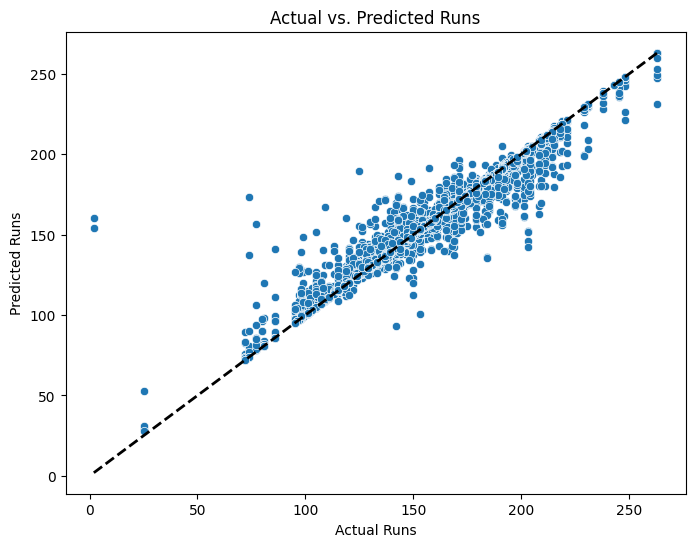

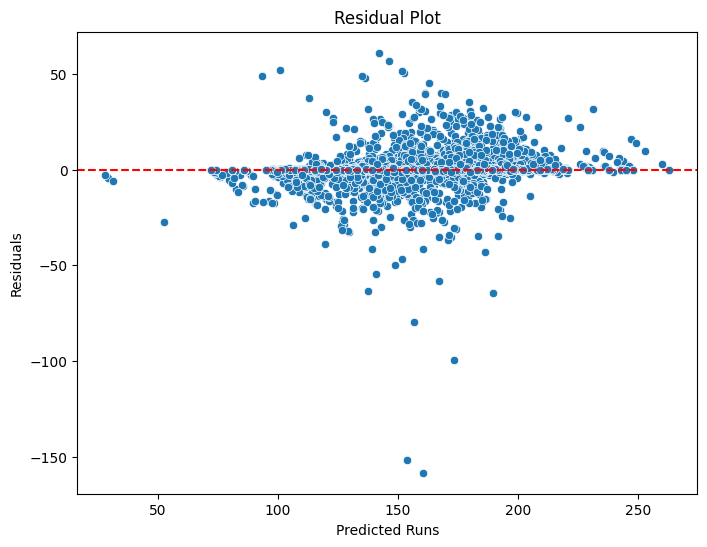

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# 1. Predicted vs. Actual Values Scatter Plot:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs. Predicted Runs')
plt.show()

# 2. Residual Plot:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Runs')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

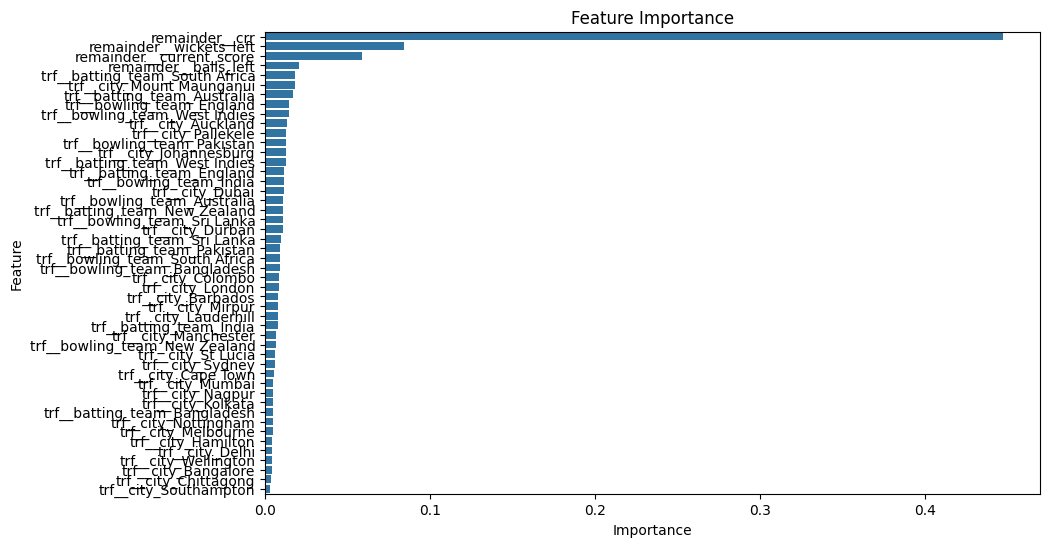

In [ ]:
# 3. Feature Importance (for RandomForestRegressor):
# Changed from 'step3' to 'regressor' to match your pipeline
if isinstance(pipe.named_steps['regressor'], RandomForestRegressor):
    feature_importances = pipe.named_steps['regressor'].feature_importances_
    features = pipe.named_steps['preprocessor'].get_feature_names_out()
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

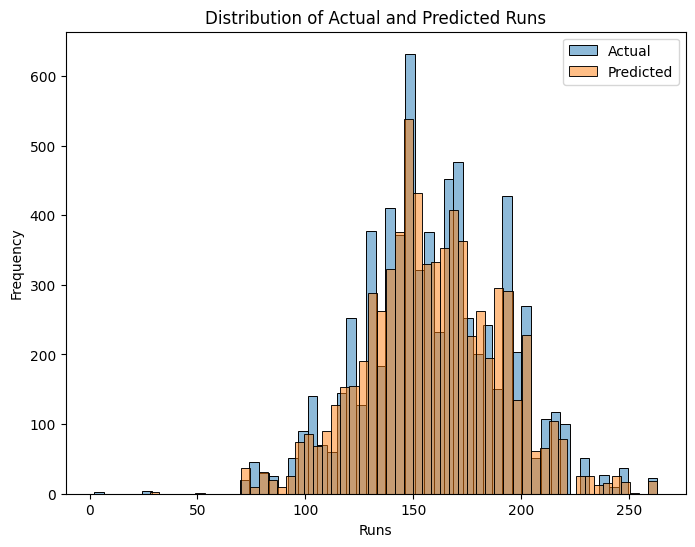

In [ ]:
# 5. Distribution of Predicted and Actual Values:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, label='Actual', alpha=0.5)
sns.histplot(y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Runs')
plt.legend()
plt.show()

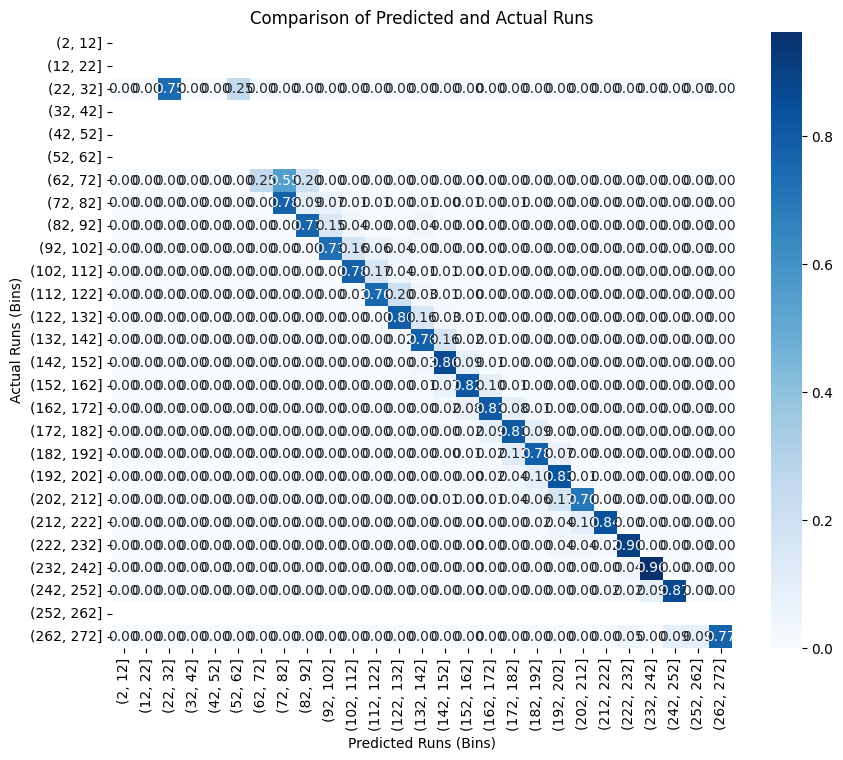

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create bins for runs
bins = np.arange(y_test.min(), y_test.max() + 10, 10)  # Adjust bin size as needed

# Create a cross-tabulation (similar to confusion matrix)
cm = pd.crosstab(pd.cut(y_test, bins), pd.cut(y_pred, bins), values=y_test, aggfunc='count')

# Normalize the values for better visualization
cm = cm.div(cm.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Runs (Bins)')
plt.ylabel('Actual Runs (Bins)')
plt.title('Comparison of Predicted and Actual Runs')
plt.show()